# Part A: Minimax Algorithm

In [ ]:
!pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Custom tree structure
tree = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O']
}

# Leaf utilities
utilities = {
    'H': 19, 'I': 22, 'J': 12, 'K': 8,
    'L': 25, 'M': -8, 'N': 13, 'O': 23
}

In [ ]:
# Build the graph for visualization
G = nx.DiGraph()
positions = {}  # node positions for drawing
labels = {}     # node labels

In [ ]:
# Recursive function to set positions
def set_positions(node, x=0, y=0, dx=1):
    positions[node] = (x, y)
    labels[node] = f"{node}\n{utilities[node]}" if node in utilities else node
    if node in tree:
        children = tree[node]
        set_positions(children[0], x - dx, y - 1, dx / 2)
        set_positions(children[1], x + dx, y - 1, dx / 2)

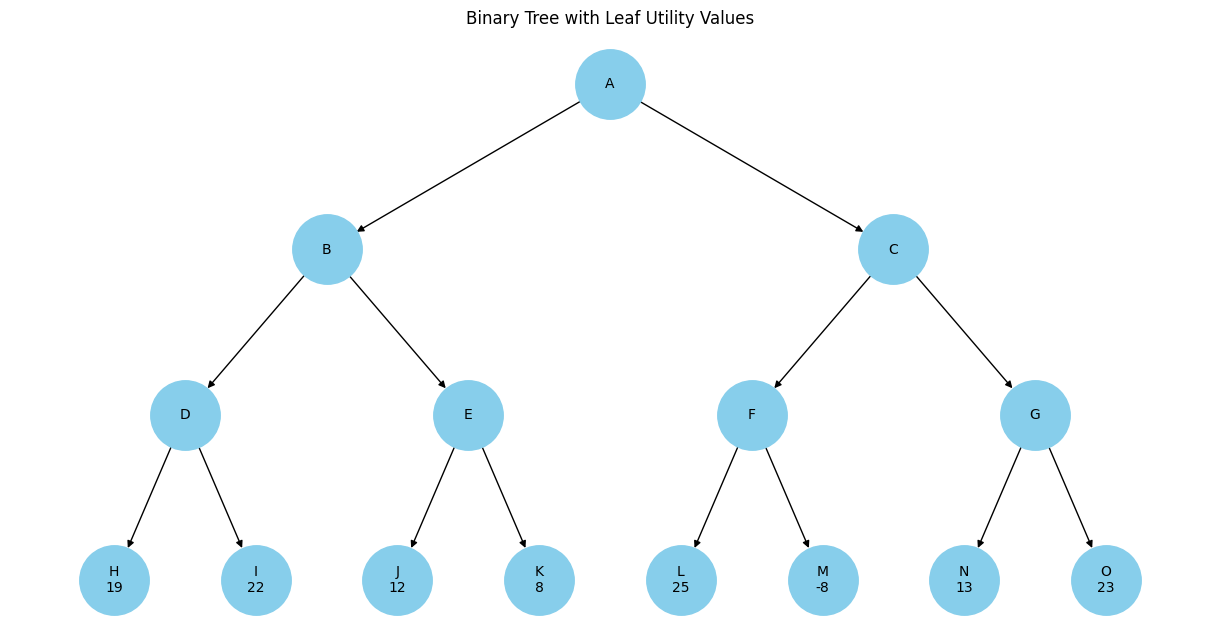

In [ ]:
# Add edges and compute positions
for parent, children in tree.items():
    for child in children:
        G.add_edge(parent, child)
set_positions('A', 0, 0, 4)

# Draw
plt.figure(figsize=(12, 6))
nx.draw(G, pos=positions, with_labels=True, labels=labels, node_size=2500, node_color='skyblue', font_size=10)
plt.title("Binary Tree with Leaf Utility Values")
plt.axis('off')
plt.show()


In [ ]:
# Minimax with full path tracing

def minimax_trace(node, is_maximizing, depth=0):
    indent = "  " * depth  # for visual indentation

    # Terminal node (leaf)
    if node not in tree:
        print(f"{indent}Reached leaf {node} with utility {utilities[node]}")
        return utilities[node]

    children = tree[node]
    values = []

    for child in children:
        val = minimax_trace(child, not is_maximizing, depth + 1)
        values.append(val)

    if is_maximizing:
        best_value = max(values)
        print(f"{indent}MAX at node {node}: children {children} → values {values} → max = {best_value}")
    else:
        best_value = min(values)
        print(f"{indent}MIN at node {node}: children {children} → values {values} → min = {best_value}")

    return best_value

# Run with trace
print("Running Minimax with Trace:\n")
optimal_value = minimax_trace('A', is_maximizing=True)
print("\nOptimal value at root (A):", optimal_value)


Running Minimax with Trace:

      Reached leaf H with utility 19
      Reached leaf I with utility 22
    MAX at node D: children ['H', 'I'] → values [19, 22] → max = 22
      Reached leaf J with utility 12
      Reached leaf K with utility 8
    MAX at node E: children ['J', 'K'] → values [12, 8] → max = 12
  MIN at node B: children ['D', 'E'] → values [22, 12] → min = 12
      Reached leaf L with utility 25
      Reached leaf M with utility -8
    MAX at node F: children ['L', 'M'] → values [25, -8] → max = 25
      Reached leaf N with utility 13
      Reached leaf O with utility 23
    MAX at node G: children ['N', 'O'] → values [13, 23] → max = 23
  MIN at node C: children ['F', 'G'] → values [25, 23] → min = 23
MAX at node A: children ['B', 'C'] → values [12, 23] → max = 23

Optimal value at root (A): 23


# Part B: Alpha-Beta Pruning:

In [ ]:
leaf_values = [3, 4, 2, 1, 7, 8, 9, 10, 2, 11, 1, 12, 14, 9, 13, 16]

# Build a binary tree as a complete tree with 31 nodes (0 to 30)
# 0 is the root, leaves are 15 to 30
G = nx.DiGraph()
for i in range(15):
    left = 2 * i + 1
    right = 2 * i + 2
    G.add_edge(i, left)
    G.add_edge(i, right)

# Assign utility values to the leaf nodes
utilities = {i: leaf_values[i - 15] for i in range(15, 31)}

In [ ]:
def plot_tree(G, utilities=None):
    pos = hierarchy_pos(G, 0)
    labels = {i: f"{i}\n{utilities[i]}" if i in utilities else str(i) for i in G.nodes()}
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue', node_size=1000)
    plt.title("Binary Tree with Leaf Utility Values")
    plt.axis('off')
    plt.show()

In [ ]:
def hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = {root: (xcenter, vert_loc)}
    children = list(G.successors(root))
    if len(children) != 0:
        dx = width / 2
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos.update(hierarchy_pos(G, child, width=dx, vert_gap=vert_gap,
                                     vert_loc=vert_loc - vert_gap, xcenter=nextx))
    return pos

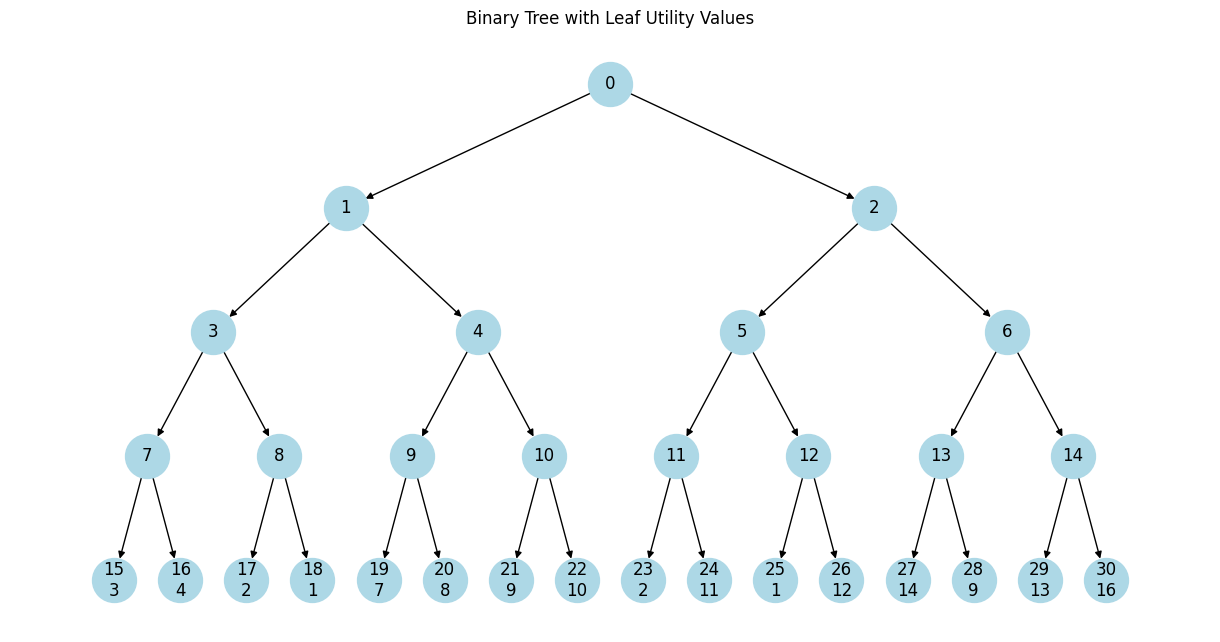

In [ ]:
plot_tree(G, utilities)

In [ ]:

def alpha_beta(node, alpha, beta, maximizing):
    # If it's a leaf, return its utility
    if node in utilities:
        print(f"Leaf node {node} with value {utilities[node]}")
        return utilities[node]

    if maximizing:
        value = float('-inf')
        for child in G.successors(node):
            print(f"MAX: Visiting child {child} of node {node}")
            value = max(value, alpha_beta(child, alpha, beta, False))
            alpha = max(alpha, value)
            print(f"MAX: Node {node}, value updated to {value}, alpha={alpha}, beta={beta}")
            if beta <= alpha:
                print(f"MAX: Pruning at node {node} with alpha={alpha}, beta={beta}")
                break
        return value
    else:
        value = float('inf')
        for child in G.successors(node):
            print(f"MIN: Visiting child {child} of node {node}")
            value = min(value, alpha_beta(child, alpha, beta, True))
            beta = min(beta, value)
            print(f"MIN: Node {node}, value updated to {value}, alpha={alpha}, beta={beta}")
            if beta <= alpha:
                print(f"MIN: Pruning at node {node} with alpha={alpha}, beta={beta}")
                break
        return value

In [ ]:
print("\nRunning Alpha-Beta Pruning...\n")
optimal_value = alpha_beta(0, float('-inf'), float('inf'), True)
print(f"\n✅ Optimal value at root: {optimal_value}")


Running Alpha-Beta Pruning...

MAX: Visiting child 1 of node 0
MIN: Visiting child 3 of node 1
MAX: Visiting child 7 of node 3
MIN: Visiting child 15 of node 7
Leaf node 15 with value 3
MIN: Node 7, value updated to 3, alpha=-inf, beta=3
MIN: Visiting child 16 of node 7
Leaf node 16 with value 4
MIN: Node 7, value updated to 3, alpha=-inf, beta=3
MAX: Node 3, value updated to 3, alpha=3, beta=inf
MAX: Visiting child 8 of node 3
MIN: Visiting child 17 of node 8
Leaf node 17 with value 2
MIN: Node 8, value updated to 2, alpha=3, beta=2
MIN: Pruning at node 8 with alpha=3, beta=2
MAX: Node 3, value updated to 3, alpha=3, beta=inf
MIN: Node 1, value updated to 3, alpha=-inf, beta=3
MIN: Visiting child 4 of node 1
MAX: Visiting child 9 of node 4
MIN: Visiting child 19 of node 9
Leaf node 19 with value 7
MIN: Node 9, value updated to 7, alpha=-inf, beta=3
MIN: Visiting child 20 of node 9
Leaf node 20 with value 8
MIN: Node 9, value updated to 7, alpha=-inf, beta=3
MAX: Node 4, value updated